# Machine Learning com Anaconda
## Estimando Preços dos Imóveis de Boston
# Importando Bibliotecas e Tabelas

In [26]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis em Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape)
display(data.head(10))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


# Explorando os Dados

In [6]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print "Estatísticas para os dados dos imóveis de Boston:\n"
print "Preço mínimo: ${:,.2f}".format(minimum_price)
print "Preço máximo: ${:,.2f}".format(maximum_price)
print "Preço médio: ${:,.2f}".format(mean_price)
print "Preço mediano: ${:,.2f}".format(median_price)
print "Desvio padrão dos preços: ${:,.2f}".format(std_price)

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


# Expondo Graficamente

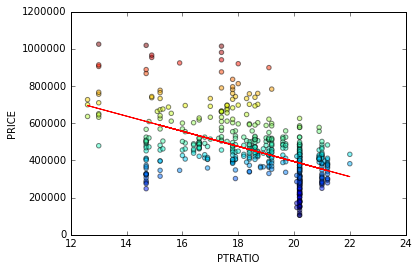

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
pt_ratio = data['PTRATIO'].reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color='red', linewidth=1)
plt.scatter(pt_ratio, prices, alpha=0.5, c=prices)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

## Observação de Atributos - Desenvolvendo um Modelo

Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: 'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

# Implementação: Definir uma Métrica de Desempenho

In [9]:
def performance_metric(y_true, y_predict):
    """Calcular e retornar a pontuação de desempenho entre
    valores reais e estimados baseado na métrica escolhida."""
    
    # Importar o 'r2_score'
    from sklearn.metrics import r2_score
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [10]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score)

O coeficiente de determinação, R^2, do modelo é 0.923.


## Misturar e Separar os Dados, Treinamento e Teste

In [11]:
from sklearn.model_selection import train_test_split  

# Misturar e separar os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print "Separação entre treino e teste feita com êxito."

Separação entre treino e teste feita com êxito.


## Analisando o Modelo de Desempenho - Curvas de Aprendizagem

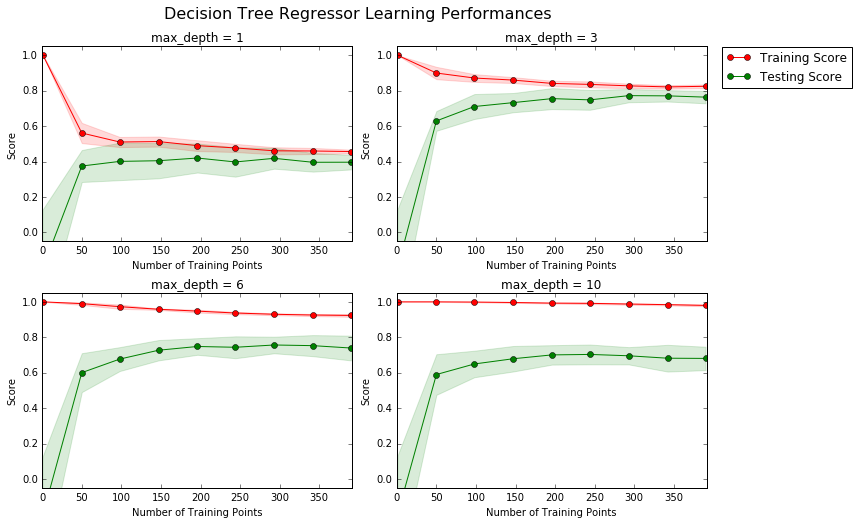

In [12]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e produnfidades máximas
vs.ModelLearning(features, prices)

## Curvas de Complexidade - Compreendendo os Dados 

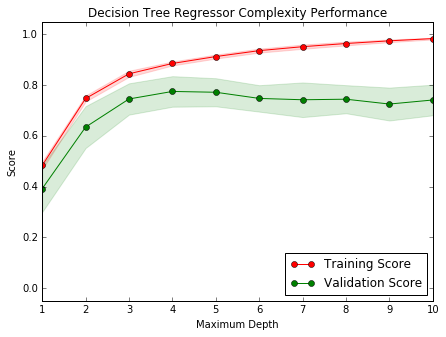

In [13]:
# Criar curva de complexidade para entender sobre os dados em max_depth diferentes
vs.ModelComplexity(x_train, y_train)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """Desempenhar busca em matriz sobre o parâmetro 'max_depth' para uma
    árvore de decisão de regressão treinada nos dados de entrada [x, y]"""
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor(random_state=0)
    
    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': range(1,11)}
    
    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
     # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets, verbose=0)
    
    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)
    
    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas - Modelo Ótimo

In [18]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(x_train, y_train)
# Produzir valores para 'max_depth'
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'max_depth' é 4 para o modelo ótimo.


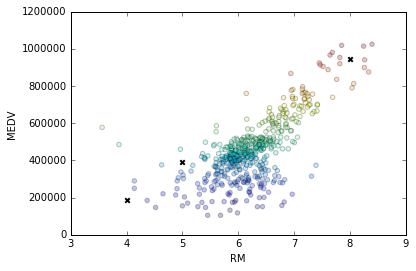

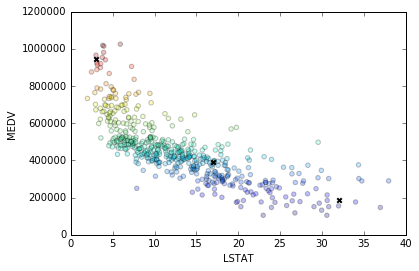

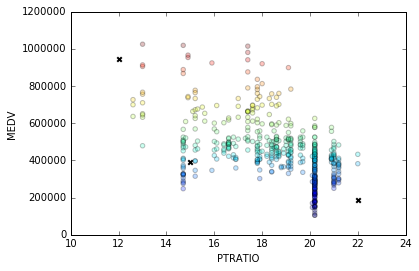

In [22]:
from matplotlib import pyplot as plt

clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

### Questão 10 -Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de quartos em um imóvel | 5 quartos | 4 quartos | 8 quartos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |

In [20]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print "Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price)

Preço estimado para a casa do cliente 1: $391,183.33
Preço estimado para a casa do cliente 2: $189,123.53
Preço estimado para a casa do cliente 3: $942,666.67


## Sensibilidade

In [21]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


# Conclusão - Aplicabilidade

### Caso exista um melhor treinamento, e assertividade nos testes, é possivel usar as configurações no mundo real. Os dados de 1978 podem ser usados como parametros de testes, já que auxiliam no momento de calibrar o algoritimo de aprendizagem. Os atributos presentes conseguem sim descrever um imóvel, porém poderia ser construido um modelo um pouco mais robusto. Sim, atravez da validção cruzada é possivel melhorar o treinamento e assertividade dos dados. Esses dados não serviriam para uma cidade rural, já que as variaveis como como nivel de pobreza da vizinhança e Razão estudante: professor das escolas proximas vai ser muito diferente do que em um ambiente urbano.